In [2]:
import numpy as np
import math
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
plt.style.use("seaborn-darkgrid")
mpl.rcParams["figure.figsize"]=(14,5)
mpl.rcParams["axes.facecolor"]="0.9"
mpl.rcParams["axes.titlesize"]=16
mpl.rcParams["axes.labelsize"]=15

## The Central Limit Theorem

Recall that online game where you win a small prize with probability 0.2. We looked at the random variable $X$ = 'number of small prizes' in $n$ gambles and found that $X$ has the binomial distribution with that $n$ and $p$ = 0.2.

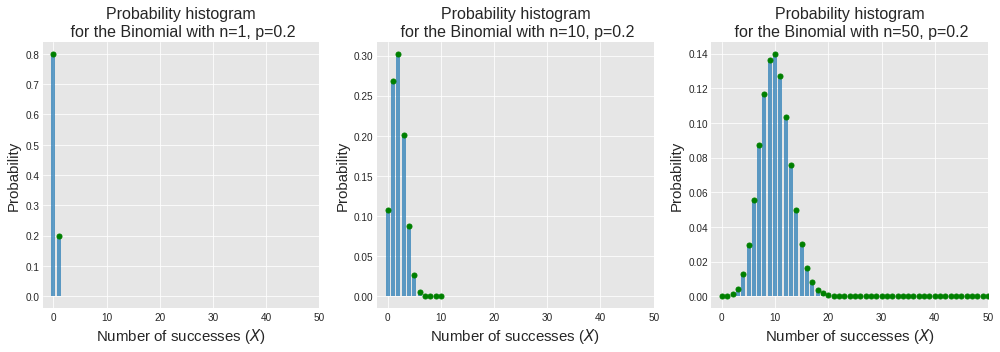

In [4]:

fig, axs = plt.subplots(1,3)

n = [1, 10, 50]
p = 0.2
for i, ax in enumerate(axs):
    
    x = np.arange(0, n[i]+1)
    pmf_x = binom.pmf(x, n[i], p)

    ax.vlines(x, 0, binom.pmf(x, n[i], p), lw=4, alpha=0.7)
    ax.set_xlabel(r'Number of successes ($X$)')
    ax.set_ylabel(r'Probability')
    ax.set_title(f'Probability histogram\n for the Binomial with n={n[i]}, p={p}')
    ax.plot(x, pmf_x, 'go', ms=5)
    ax.set_xlim(-2, 50)
    plt.tight_layout()

An $n$ gets large, the probability histogram looks more and more similar to the normal curve. This is an example of the **central limit theorem**:

When sampling with replacement and $n$ is large, then the sampling distribution of the sample average (or sum or percentage) approximately follows the normal curve. To standardize, subtract off the expecte value of the statistic, then divide by its SE.

The key point of the theorem is that we know that the sampling distribution of the statistic is normal no *matter what the population histogram is*:

| <img width=500px src=householdincome.png> | $\mu{~}={~}\${~}67,000 \newline $ $ \sigma{~}={~}\${~}38,000$|
| --- | --- |

The reason why the central limit theorem is so important is that it shows the statistics has normal distribution no matter what the population histogram is.

If we sample $n$ incomes at random, then the sample average $\tilde{x}_n$ follows the normal curve centered at $E(\tilde{x}_n)$ = $\mu$ = $\$ 67,000$ and with its spread given by $SE(\tilde{x}_n)$ = $\frac{\sigma}{\sqrt{n}}$ = $\frac{\$ 38,000}{\sqrt{n}}$.

For example, if we sample 100 incomes, then by the empirical rule there is about a 16% chance that $\tilde{x}_n$ is larger than $\${~}70,800$:

$E(\tilde{x}_n) = \${~}67,000$, and $SE(\tilde{x}_n) = 3,800$ (because $n = 100$)

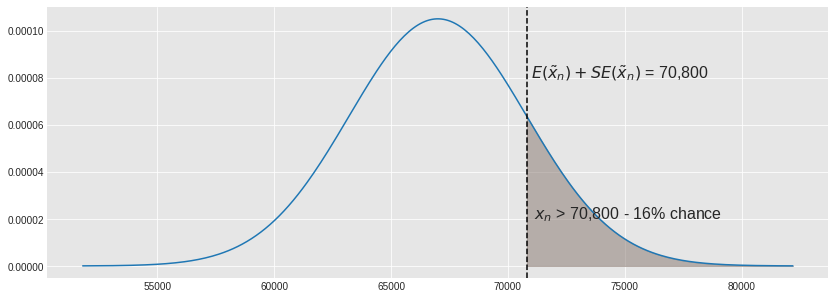

In [10]:

mu = 67000
sigma = 3800
x = np.arange(mu - 4*sigma, mu + 4*sigma, 99)
ax = sns.lineplot(x=x, y=norm.pdf(x, mu, sigma))
kde_x, kde_y = ax.lines[0].get_data()

ax.axvline(70800, color = 'k', linestyle="--")

ax.annotate(r"$E(\tilde{x}_n) + SE(\tilde{x}_n)$ = 70,800", xy=(71000, 0.00008),fontsize=16)

ax.annotate(r"${x}_n$ > 70,800 - 16% chance", xy=(71100, 0.00002),fontsize=16)

_ = ax.fill_between(kde_x, kde_y, 
where=(kde_x > 70800) , 
interpolate=True, color='#85756d', alpha=0.50)

In the example about gambling, we had $X$ = 'number of small prizes' in $n$ gambles.

Since we are counting the number of small prizes, we use a label for each gamble which shows '1' if a small prize is won and '0' otherwise.

Then $X$ equals the sum of these labels and so the central limit theorem applies.

Using the formulas for $\mu$ and $\sigma$ in the case of simulations we fin $\mu=p$ and $\sigma=\sqrt{p(1-p)}$.

Therefore we standardize the sum $X$ with the $E(X)=np$ and $SE(X) = \sqrt{np(1-p)}$.